In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, adjusted_rand_score

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=random.randint(0, 100))

In [8]:
kmeans = KMeans(n_clusters=3, random_state=random.randint(0, 100))
kmeans.fit(X_train)
labels = kmeans.labels_

d:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\Anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^

In [9]:
y_kmeans = kmeans.predict(X_train)

C:\Users\Acer\AppData\Local\Temp\ipykernel_12780\583024158.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


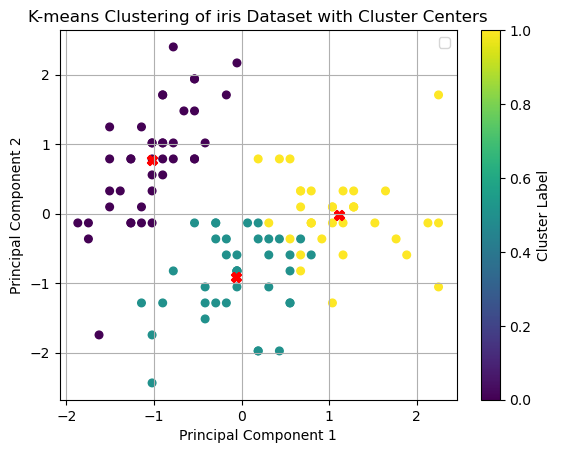

In [10]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_kmeans, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red', marker='X')
plt.title('K-means Clustering of iris Dataset with Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red', marker='X'), label='Cluster Label')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
kmeans.fit(X_train)
y_kmeans_train = kmeans.predict(X_train)
y_kmeans_test = kmeans.predict(X_test)

# If you really want to compare with true labels:
# However, be aware that k-means labels might need to be remapped
# to the corresponding class labels before such comparison.

# Example of adjusted_rand_score (does not require label matching)
ari_score = adjusted_rand_score(y_test, y_kmeans_test)
print("Adjusted Rand Index:", ari_score)

# If you insist on using accuracy_score, consider the following workaround:
# Map the cluster labels to the true labels
from scipy.stats import mode

def map_cluster_to_label(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for i in range(len(np.unique(y_pred))):
        mask = (y_pred == i)
        labels[mask] = mode(y_true[mask])[0]
    return labels

y_kmeans_test_mapped = map_cluster_to_label(y_test, y_kmeans_test)

# Now you can use accuracy_score
print("Classification Accuracy:", accuracy_score(y_test, y_kmeans_test_mapped))
print("Classification Report:\n", classification_report(y_test, y_kmeans_test_mapped))

Adjusted Rand Index: 0.5725656379548595
Classification Accuracy: 0.8421052631578947
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      0.75      0.80        16
           2       0.71      0.83      0.77        12

    accuracy                           0.84        38
   macro avg       0.86      0.86      0.86        38
weighted avg       0.85      0.84      0.84        38



d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
